In [1]:
# Python 수치해석 라이브러리
import numpy as np

# 회귀 분석용 테스트 데이터 만들어주는 라이브러리
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples = 500, n_features = 2,
    n_informative = 2, noise = 5,
    random_state = 0 # 완전 자율적으로!
)

print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [2]:
# X, y = make_regression(
#     n_samples = 500, n_features = 2,
#     n_informative = 2, noise = 5,
#     random_state = 0 # 완전 자율적으로!
# )

help(make_regression)

# 랜덤한 regression problem을 생성함. (train, test 데이터를 이것을 통해 만들었으니까)
# n_informative : 사용되는 features의 개수
# 이 사용된 features의 개수를 이용해서 linear 모델을 만들 것.
# output을 생성하기 위해서 이런 것을 한다는 것!!

# 예를 들어서, n_informative = 2이면,
# y = ax + b라고 했을 때, y와 x가 informative features라고 할 수 있는 것.

# 만약 n_informative = 3이라면,  
# 얘를 컨트롤할 수 있는 요소가 3개가 있어야 하는 것!

Help on function make_regression in module sklearn.datasets._samples_generator:

make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
    Generate a random regression problem.
    
    The input set can either be well conditioned (by default) or have a low
    rank-fat tail singular profile. See :func:`make_low_rank_matrix` for
    more details.
    
    The output is generated by applying a (potentially biased) random linear
    regression model with `n_informative` nonzero regressors to the previously
    generated input and some gaussian centered noise with some adjustable
    scale.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of samples.
    
    n_features : int, optional (default=100)
        The number of features.
    
    n_informa

In [3]:
# 범위를 어디서부터 어디까지 받을 것인가 확인

print("output range = [%f %f]" %(min(y), max(y)))

output range = [-288.225754 271.270135]


In [4]:
# 만약 실행 안되면 pip install keras 해주면 됨.
from keras.models import Sequential
from keras.layers import Dense, Activation

In [5]:
def model_build():
    model = Sequential()
    
    model.add(Dense(16, input_dim = 2, activation = "relu"))
    model.add(Dense(8, activation = "relu"))
    model.add(Dense(1))
    
    # loss는 최소제곱오차를 사용했음
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    
    return model

In [6]:
from keras.wrappers.scikit_learn import KerasRegressor

In [7]:
YourModel = KerasRegressor(
    build_fn = model_build,
    epochs = 400,
    batch_size = 10,
    verbose = 1
)


# KeraseClassifier : 분류기
# KerasRegressor : 모델 생성기 (회귀분석 생성기)

In [8]:
# 폴딩해주기

from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)

In [9]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(YourModel, X, y, cv = kf)

# 복잡한 모델이 아니어서 금방 실행 됨.
# Hyper Parameter는 모델이 별로 없으면 학습이 금방 됨.

Epoch 1/400
40/40 [==============================] - 0s 554us/step - loss: 10798.9248
Epoch 2/400
40/40 [==============================] - 0s 566us/step - loss: 10762.7588
Epoch 3/400
40/40 [==============================] - 0s 512us/step - loss: 10713.1562
Epoch 4/400
40/40 [==============================] - 0s 509us/step - loss: 10628.7549
Epoch 5/400
40/40 [==============================] - 0s 504us/step - loss: 10506.6387
Epoch 6/400
40/40 [==============================] - 0s 532us/step - loss: 10336.0586
Epoch 7/400
40/40 [==============================] - 0s 534us/step - loss: 10108.0264
Epoch 8/400
40/40 [==============================] - 0s 522us/step - loss: 9805.9072
Epoch 9/400
40/40 [==============================] - 0s 498us/step - loss: 9431.3828
Epoch 10/400
40/40 [==============================] - 0s 550us/step - loss: 8971.4180
Epoch 11/400
40/40 [==============================] - 0s 529us/step - loss: 8437.9746
Epoch 12/400
40/40 [==============================] - 0s

40/40 [==============================] - 0s 581us/step - loss: 119.0425
Epoch 98/400
40/40 [==============================] - 0s 583us/step - loss: 115.6566
Epoch 99/400
40/40 [==============================] - 0s 595us/step - loss: 112.0264
Epoch 100/400
40/40 [==============================] - 0s 606us/step - loss: 109.4910
Epoch 101/400
40/40 [==============================] - 0s 571us/step - loss: 106.3094
Epoch 102/400
40/40 [==============================] - 0s 604us/step - loss: 104.4471
Epoch 103/400
40/40 [==============================] - 0s 617us/step - loss: 101.3820
Epoch 104/400
40/40 [==============================] - 0s 782us/step - loss: 97.4273
Epoch 105/400
40/40 [==============================] - 0s 861us/step - loss: 94.6242
Epoch 106/400
40/40 [==============================] - 0s 966us/step - loss: 91.9920
Epoch 107/400
40/40 [==============================] - 0s 977us/step - loss: 89.0593
Epoch 108/400
40/40 [==============================] - 0s 1ms/step - loss:

40/40 [==============================] - 0s 528us/step - loss: 26.1960
Epoch 195/400
40/40 [==============================] - 0s 520us/step - loss: 26.0683
Epoch 196/400
40/40 [==============================] - 0s 504us/step - loss: 26.7170
Epoch 197/400
40/40 [==============================] - 0s 624us/step - loss: 26.3318
Epoch 198/400
40/40 [==============================] - 0s 512us/step - loss: 26.2043
Epoch 199/400
40/40 [==============================] - 0s 511us/step - loss: 26.1970
Epoch 200/400
40/40 [==============================] - 0s 515us/step - loss: 26.0218
Epoch 201/400
40/40 [==============================] - 0s 508us/step - loss: 26.5294
Epoch 202/400
40/40 [==============================] - 0s 506us/step - loss: 26.1004
Epoch 203/400
40/40 [==============================] - 0s 571us/step - loss: 26.0282
Epoch 204/400
40/40 [==============================] - 0s 563us/step - loss: 25.7980
Epoch 205/400
40/40 [==============================] - 0s 660us/step - loss: 25

40/40 [==============================] - 0s 1ms/step - loss: 24.3909
Epoch 291/400
40/40 [==============================] - 0s 564us/step - loss: 25.0669
Epoch 292/400
40/40 [==============================] - 0s 500us/step - loss: 24.5152
Epoch 293/400
40/40 [==============================] - 0s 552us/step - loss: 24.5020
Epoch 294/400
40/40 [==============================] - 0s 631us/step - loss: 24.5240
Epoch 295/400
40/40 [==============================] - 0s 766us/step - loss: 24.9982
Epoch 296/400
40/40 [==============================] - 0s 886us/step - loss: 24.2123
Epoch 297/400
40/40 [==============================] - 0s 896us/step - loss: 24.9672
Epoch 298/400
40/40 [==============================] - 0s 932us/step - loss: 24.8324
Epoch 299/400
40/40 [==============================] - 0s 863us/step - loss: 24.4855
Epoch 300/400
40/40 [==============================] - 0s 735us/step - loss: 24.4186
Epoch 301/400
40/40 [==============================] - 0s 497us/step - loss: 24.7

40/40 [==============================] - 0s 535us/step - loss: 24.1026
Epoch 387/400
40/40 [==============================] - 0s 520us/step - loss: 24.0195
Epoch 388/400
40/40 [==============================] - 0s 544us/step - loss: 24.1735
Epoch 389/400
40/40 [==============================] - 0s 642us/step - loss: 24.3642
Epoch 390/400
40/40 [==============================] - 0s 850us/step - loss: 24.5872
Epoch 391/400
40/40 [==============================] - 0s 920us/step - loss: 24.3755
Epoch 392/400
40/40 [==============================] - 0s 894us/step - loss: 24.1336
Epoch 393/400
40/40 [==============================] - 0s 868us/step - loss: 24.3045
Epoch 394/400
40/40 [==============================] - 0s 1ms/step - loss: 24.1754
Epoch 395/400
40/40 [==============================] - 0s 1ms/step - loss: 24.3712
Epoch 396/400
40/40 [==============================] - 0s 1ms/step - loss: 24.2745
Epoch 397/400
40/40 [==============================] - 0s 1ms/step - loss: 24.0737
Ep

40/40 [==============================] - 0s 785us/step - loss: 154.3113
Epoch 83/400
40/40 [==============================] - 0s 796us/step - loss: 152.6078
Epoch 84/400
40/40 [==============================] - 0s 811us/step - loss: 149.4028
Epoch 85/400
40/40 [==============================] - 0s 821us/step - loss: 149.2736
Epoch 86/400
40/40 [==============================] - 0s 2ms/step - loss: 146.1481
Epoch 87/400
40/40 [==============================] - 0s 2ms/step - loss: 144.7968
Epoch 88/400
40/40 [==============================] - 0s 2ms/step - loss: 142.9528
Epoch 89/400
40/40 [==============================] - 0s 2ms/step - loss: 140.2794
Epoch 90/400
40/40 [==============================] - 0s 2ms/step - loss: 138.8309
Epoch 91/400
40/40 [==============================] - 0s 1ms/step - loss: 136.3990
Epoch 92/400
40/40 [==============================] - 0s 1ms/step - loss: 134.8284
Epoch 93/400
40/40 [==============================] - 0s 1ms/step - loss: 133.4067
Epoch 94/

Epoch 179/400
40/40 [==============================] - 0s 764us/step - loss: 27.7972
Epoch 180/400
40/40 [==============================] - 0s 760us/step - loss: 27.5095
Epoch 181/400
40/40 [==============================] - 0s 854us/step - loss: 27.6875
Epoch 182/400
40/40 [==============================] - 0s 851us/step - loss: 27.3376
Epoch 183/400
40/40 [==============================] - 0s 869us/step - loss: 27.0031
Epoch 184/400
40/40 [==============================] - 0s 830us/step - loss: 27.0902
Epoch 185/400
40/40 [==============================] - 0s 851us/step - loss: 26.8963
Epoch 186/400
40/40 [==============================] - 0s 854us/step - loss: 27.0429
Epoch 187/400
40/40 [==============================] - 0s 1ms/step - loss: 26.4253
Epoch 188/400
40/40 [==============================] - 0s 2ms/step - loss: 26.6411
Epoch 189/400
40/40 [==============================] - 0s 2ms/step - loss: 26.4791
Epoch 190/400
40/40 [==============================] - 0s 578us/step - 

40/40 [==============================] - 0s 506us/step - loss: 24.0573
Epoch 276/400
40/40 [==============================] - 0s 522us/step - loss: 23.3639
Epoch 277/400
40/40 [==============================] - 0s 539us/step - loss: 23.4430
Epoch 278/400
40/40 [==============================] - 0s 541us/step - loss: 23.4860
Epoch 279/400
40/40 [==============================] - 0s 685us/step - loss: 23.3456
Epoch 280/400
40/40 [==============================] - 0s 903us/step - loss: 23.2402
Epoch 281/400
40/40 [==============================] - 0s 922us/step - loss: 23.4115
Epoch 282/400
40/40 [==============================] - 0s 893us/step - loss: 23.1867
Epoch 283/400
40/40 [==============================] - 0s 922us/step - loss: 23.3292
Epoch 284/400
40/40 [==============================] - 0s 852us/step - loss: 23.6132
Epoch 285/400
40/40 [==============================] - 0s 861us/step - loss: 23.3311
Epoch 286/400
40/40 [==============================] - 0s 1ms/step - loss: 23.3

Epoch 372/400
40/40 [==============================] - 0s 482us/step - loss: 22.9123
Epoch 373/400
40/40 [==============================] - 0s 497us/step - loss: 22.7881
Epoch 374/400
40/40 [==============================] - 0s 503us/step - loss: 22.9243
Epoch 375/400
40/40 [==============================] - 0s 686us/step - loss: 22.9323
Epoch 376/400
40/40 [==============================] - 0s 862us/step - loss: 23.1850
Epoch 377/400
40/40 [==============================] - 0s 854us/step - loss: 23.3077
Epoch 378/400
40/40 [==============================] - 0s 883us/step - loss: 22.8912
Epoch 379/400
40/40 [==============================] - 0s 973us/step - loss: 23.1318
Epoch 380/400
40/40 [==============================] - 0s 1ms/step - loss: 22.7640
Epoch 381/400
40/40 [==============================] - 0s 1ms/step - loss: 22.8151
Epoch 382/400
40/40 [==============================] - 0s 2ms/step - loss: 22.9474
Epoch 383/400
40/40 [==============================] - 0s 2ms/step - lo

40/40 [==============================] - 0s 506us/step - loss: 183.2983
Epoch 68/400
40/40 [==============================] - 0s 496us/step - loss: 181.4046
Epoch 69/400
40/40 [==============================] - 0s 505us/step - loss: 178.1958
Epoch 70/400
40/40 [==============================] - 0s 581us/step - loss: 176.5921
Epoch 71/400
40/40 [==============================] - 0s 715us/step - loss: 172.9153
Epoch 72/400
40/40 [==============================] - 0s 767us/step - loss: 170.2556
Epoch 73/400
40/40 [==============================] - 0s 882us/step - loss: 166.8628
Epoch 74/400
40/40 [==============================] - 0s 893us/step - loss: 163.3913
Epoch 75/400
40/40 [==============================] - 0s 912us/step - loss: 159.8720
Epoch 76/400
40/40 [==============================] - 0s 875us/step - loss: 156.5147
Epoch 77/400
40/40 [==============================] - 0s 938us/step - loss: 152.6607
Epoch 78/400
40/40 [==============================] - 0s 909us/step - loss: 14

40/40 [==============================] - 0s 509us/step - loss: 28.3598
Epoch 164/400
40/40 [==============================] - 0s 602us/step - loss: 28.9668
Epoch 165/400
40/40 [==============================] - 0s 595us/step - loss: 28.2204
Epoch 166/400
40/40 [==============================] - 0s 636us/step - loss: 28.2183
Epoch 167/400
40/40 [==============================] - 0s 744us/step - loss: 27.7956
Epoch 168/400
40/40 [==============================] - 0s 795us/step - loss: 28.0629
Epoch 169/400
40/40 [==============================] - 0s 1ms/step - loss: 27.5856
Epoch 170/400
40/40 [==============================] - 0s 2ms/step - loss: 27.8767
Epoch 171/400
40/40 [==============================] - 0s 2ms/step - loss: 27.3695
Epoch 172/400
40/40 [==============================] - 0s 2ms/step - loss: 27.2914
Epoch 173/400
40/40 [==============================] - 0s 581us/step - loss: 28.2829
Epoch 174/400
40/40 [==============================] - 0s 482us/step - loss: 27.2496
Ep

40/40 [==============================] - 0s 507us/step - loss: 24.2666
Epoch 260/400
40/40 [==============================] - 0s 521us/step - loss: 24.3788
Epoch 261/400
40/40 [==============================] - 0s 493us/step - loss: 24.2340
Epoch 262/400
40/40 [==============================] - 0s 500us/step - loss: 24.5200
Epoch 263/400
40/40 [==============================] - 0s 562us/step - loss: 24.6511
Epoch 264/400
40/40 [==============================] - 0s 812us/step - loss: 24.6962
Epoch 265/400
40/40 [==============================] - 0s 983us/step - loss: 24.9668
Epoch 266/400
40/40 [==============================] - 0s 976us/step - loss: 24.5604
Epoch 267/400
40/40 [==============================] - 0s 1ms/step - loss: 24.3787
Epoch 268/400
40/40 [==============================] - 0s 989us/step - loss: 24.8713
Epoch 269/400
40/40 [==============================] - 0s 999us/step - loss: 24.8196
Epoch 270/400
40/40 [==============================] - 0s 972us/step - loss: 25.1

40/40 [==============================] - 0s 609us/step - loss: 23.8055
Epoch 356/400
40/40 [==============================] - 0s 629us/step - loss: 23.8177
Epoch 357/400
40/40 [==============================] - 0s 622us/step - loss: 24.0806
Epoch 358/400
40/40 [==============================] - 0s 615us/step - loss: 23.9172
Epoch 359/400
40/40 [==============================] - 0s 608us/step - loss: 23.7881
Epoch 360/400
40/40 [==============================] - 0s 597us/step - loss: 23.9209
Epoch 361/400
40/40 [==============================] - 0s 621us/step - loss: 23.8763
Epoch 362/400
40/40 [==============================] - 0s 710us/step - loss: 23.5934
Epoch 363/400
40/40 [==============================] - 0s 618us/step - loss: 24.2253
Epoch 364/400
40/40 [==============================] - 0s 640us/step - loss: 24.8168
Epoch 365/400
40/40 [==============================] - 0s 679us/step - loss: 24.0526
Epoch 366/400
40/40 [==============================] - 0s 712us/step - loss: 23

40/40 [==============================] - 0s 570us/step - loss: 201.5977
Epoch 52/400
40/40 [==============================] - 0s 584us/step - loss: 202.0839
Epoch 53/400
40/40 [==============================] - 0s 639us/step - loss: 200.2918
Epoch 54/400
40/40 [==============================] - 0s 621us/step - loss: 196.7314
Epoch 55/400
40/40 [==============================] - 0s 611us/step - loss: 196.0513
Epoch 56/400
40/40 [==============================] - 0s 575us/step - loss: 192.4159
Epoch 57/400
40/40 [==============================] - 0s 590us/step - loss: 190.6495
Epoch 58/400
40/40 [==============================] - 0s 667us/step - loss: 188.3288
Epoch 59/400
40/40 [==============================] - 0s 597us/step - loss: 186.4156
Epoch 60/400
40/40 [==============================] - 0s 589us/step - loss: 183.2072
Epoch 61/400
40/40 [==============================] - 0s 644us/step - loss: 180.3493
Epoch 62/400
40/40 [==============================] - 0s 903us/step - loss: 17

40/40 [==============================] - 0s 645us/step - loss: 30.3812
Epoch 148/400
40/40 [==============================] - 0s 545us/step - loss: 30.2477
Epoch 149/400
40/40 [==============================] - 0s 527us/step - loss: 30.0355
Epoch 150/400
40/40 [==============================] - 0s 534us/step - loss: 29.8520
Epoch 151/400
40/40 [==============================] - 0s 561us/step - loss: 30.0422
Epoch 152/400
40/40 [==============================] - 0s 558us/step - loss: 29.4499
Epoch 153/400
40/40 [==============================] - 0s 552us/step - loss: 29.2969
Epoch 154/400
40/40 [==============================] - 0s 536us/step - loss: 29.4222
Epoch 155/400
40/40 [==============================] - 0s 536us/step - loss: 29.0594
Epoch 156/400
40/40 [==============================] - 0s 525us/step - loss: 28.6339
Epoch 157/400
40/40 [==============================] - 0s 553us/step - loss: 28.5725
Epoch 158/400
40/40 [==============================] - 0s 547us/step - loss: 28

40/40 [==============================] - 0s 767us/step - loss: 23.2181
Epoch 244/400
40/40 [==============================] - 0s 746us/step - loss: 23.3443
Epoch 245/400
40/40 [==============================] - 0s 775us/step - loss: 22.5778
Epoch 246/400
40/40 [==============================] - 0s 791us/step - loss: 22.8112
Epoch 247/400
40/40 [==============================] - 0s 865us/step - loss: 22.7424
Epoch 248/400
40/40 [==============================] - 0s 886us/step - loss: 23.0142
Epoch 249/400
40/40 [==============================] - 0s 961us/step - loss: 23.2291
Epoch 250/400
40/40 [==============================] - 0s 986us/step - loss: 22.4655
Epoch 251/400
40/40 [==============================] - 0s 959us/step - loss: 22.6220
Epoch 252/400
40/40 [==============================] - 0s 985us/step - loss: 22.4419
Epoch 253/400
40/40 [==============================] - 0s 1ms/step - loss: 22.4972
Epoch 254/400
40/40 [==============================] - 0s 994us/step - loss: 22.8

40/40 [==============================] - 0s 700us/step - loss: 21.0671
Epoch 341/400
40/40 [==============================] - 0s 682us/step - loss: 21.0435
Epoch 342/400
40/40 [==============================] - 0s 748us/step - loss: 21.3539
Epoch 343/400
40/40 [==============================] - 0s 671us/step - loss: 21.1681
Epoch 344/400
40/40 [==============================] - 0s 712us/step - loss: 21.3098
Epoch 345/400
40/40 [==============================] - 0s 752us/step - loss: 21.2838
Epoch 346/400
40/40 [==============================] - 0s 687us/step - loss: 21.5155
Epoch 347/400
40/40 [==============================] - 0s 704us/step - loss: 20.9992
Epoch 348/400
40/40 [==============================] - 0s 703us/step - loss: 21.0805
Epoch 349/400
40/40 [==============================] - 0s 743us/step - loss: 21.3025
Epoch 350/400
40/40 [==============================] - 0s 723us/step - loss: 21.8207
Epoch 351/400
40/40 [==============================] - 0s 706us/step - loss: 21

40/40 [==============================] - 0s 550us/step - loss: 264.3048
Epoch 36/400
40/40 [==============================] - 0s 603us/step - loss: 253.5264
Epoch 37/400
40/40 [==============================] - 0s 657us/step - loss: 248.0174
Epoch 38/400
40/40 [==============================] - 0s 715us/step - loss: 246.4883
Epoch 39/400
40/40 [==============================] - 0s 672us/step - loss: 243.6804
Epoch 40/400
40/40 [==============================] - 0s 660us/step - loss: 242.8306
Epoch 41/400
40/40 [==============================] - 0s 695us/step - loss: 241.5835
Epoch 42/400
40/40 [==============================] - 0s 671us/step - loss: 240.0191
Epoch 43/400
40/40 [==============================] - 0s 783us/step - loss: 240.5860
Epoch 44/400
40/40 [==============================] - 0s 766us/step - loss: 236.7831
Epoch 45/400
40/40 [==============================] - 0s 757us/step - loss: 235.7208
Epoch 46/400
40/40 [==============================] - 0s 776us/step - loss: 23

40/40 [==============================] - 0s 727us/step - loss: 54.6712
Epoch 132/400
40/40 [==============================] - 0s 746us/step - loss: 53.0126
Epoch 133/400
40/40 [==============================] - 0s 750us/step - loss: 51.5194
Epoch 134/400
40/40 [==============================] - 0s 811us/step - loss: 49.9607
Epoch 135/400
40/40 [==============================] - 0s 741us/step - loss: 48.4853
Epoch 136/400
40/40 [==============================] - 0s 849us/step - loss: 47.4340
Epoch 137/400
40/40 [==============================] - 0s 860us/step - loss: 46.2171
Epoch 138/400
40/40 [==============================] - 0s 826us/step - loss: 44.5143
Epoch 139/400
40/40 [==============================] - 0s 795us/step - loss: 43.3613
Epoch 140/400
40/40 [==============================] - 0s 845us/step - loss: 42.3128
Epoch 141/400
40/40 [==============================] - 0s 887us/step - loss: 41.1745
Epoch 142/400
40/40 [==============================] - 0s 859us/step - loss: 40

40/40 [==============================] - 0s 732us/step - loss: 22.7363
Epoch 228/400
40/40 [==============================] - 0s 800us/step - loss: 22.6110
Epoch 229/400
40/40 [==============================] - 0s 730us/step - loss: 22.4958
Epoch 230/400
40/40 [==============================] - 0s 730us/step - loss: 22.7049
Epoch 231/400
40/40 [==============================] - 0s 729us/step - loss: 22.3839
Epoch 232/400
40/40 [==============================] - 0s 740us/step - loss: 22.1806
Epoch 233/400
40/40 [==============================] - 0s 745us/step - loss: 22.4310
Epoch 234/400
40/40 [==============================] - 0s 720us/step - loss: 22.8721
Epoch 235/400
40/40 [==============================] - 0s 756us/step - loss: 22.3865
Epoch 236/400
40/40 [==============================] - 0s 776us/step - loss: 22.2647
Epoch 237/400
40/40 [==============================] - 0s 901us/step - loss: 22.8403
Epoch 238/400
40/40 [==============================] - 0s 1ms/step - loss: 22.5

40/40 [==============================] - 0s 644us/step - loss: 21.4433
Epoch 324/400
40/40 [==============================] - 0s 614us/step - loss: 21.6527
Epoch 325/400
40/40 [==============================] - 0s 639us/step - loss: 21.6761
Epoch 326/400
40/40 [==============================] - 0s 626us/step - loss: 21.6193
Epoch 327/400
40/40 [==============================] - 0s 627us/step - loss: 21.5347
Epoch 328/400
40/40 [==============================] - 0s 618us/step - loss: 21.7453
Epoch 329/400
40/40 [==============================] - 0s 668us/step - loss: 22.0907
Epoch 330/400
40/40 [==============================] - 0s 740us/step - loss: 21.4670
Epoch 331/400
40/40 [==============================] - 0s 824us/step - loss: 21.8856
Epoch 332/400
40/40 [==============================] - 0s 761us/step - loss: 21.6556
Epoch 333/400
40/40 [==============================] - 0s 776us/step - loss: 21.7045
Epoch 334/400
40/40 [==============================] - 0s 742us/step - loss: 21

In [10]:
print("Final Cross Validation Loss:", abs(results.mean()))

# results.mean() : 전체 결과의 평균 (전체 loss의 평균값을 구한 것!)
# 최종적으로 cross Validation Loss가 약 25로 상당히 큼.

# 점점 가면서 loss를 줄여가면서 과적합을 최소화하는 방법을 살펴볼 것임.
# 우선은 아직 regulizer는 들어가지 않았음.

Final Cross Validation Loss: 25.916485595703126


In [11]:
import pandas as pd

X = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_feats.csv", index_col = 0
)
y = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_target.csv", index_col = 0
)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0 # 완전 랜덤하게
)

In [14]:
seed = 1
np.random.seed(seed)

In [15]:
print(X.shape)

(4521, 32)


In [16]:
model = Sequential()
model.add(Dense(8, input_dim = 32,activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd',
    metrics = ['accuracy'] # 주로 정확성을 보겠습니다. 라는 의미
)

In [17]:
trainRes = model.fit(
    X_train, y_train, 
    batch_size = 10, 
    epochs = 400, 
    validation_data = (X_test, y_test), # 교차검증 이 두개를 하겠다.
    verbose = 0
)

# input size가 좀 많아서 생각보다 오래 걸림.

Best Accuracy = 0.8769344091415405


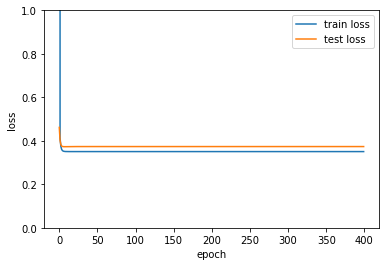

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))

# 그래프 봤을 때 별 차이 없어보임
# 학습을 많이해도 약 5번까지는 loss데이터가 확 줄어들다가 그 이상부터는 일정한 loss
# 최고의 확률이 0.87임을 확인할 수 있음.

In [19]:
# regularizers(정규화) 하기

# l1은 +,-가 교차될 수 있어서 오차 없다고 판정할 수 있어서
# 보통 l2를 쓸 것!
from keras.regularizers import l2

model = Sequential()
model.add(Dense(32, input_dim = 32, activation = 'tanh', # relu 쓰니까 결과 안좋은 것 같아서 tanh로 써보기!
                
                # 실질적으로 노이즈는 학습하지 않게 만들어주며
                # 동시에 반응성도 같이 올려주는 역할로 사용된다.
                # (정규화 과정을 상기하도록 한다!)
                # 정규화를 하면 쓸데없는 가중치를 다 쳐내니까 연산속도가 굉장히 빨라짐.
                # kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01)
                kernel_regularizer = l2(0.01)))


model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [20]:
trainRes = model.fit(
    X_train, y_train, 
    batch_size = 10, 
    epochs = 300, 
    validation_data = (X_test, y_test),
    verbose = 0
)

Best Accuracy = 0.8769344091415405


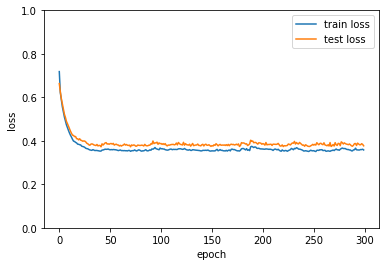

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))


# 제대로 된 결과가 나오기 시작함.
# 학습을 새롭게 하고 있는게 있으니까 loss를 많이 하는 것을 볼 수 있음.

# 지글지글 하는 모습이 기존에 있던 것과 좀 많이 다른 것이 들어 왔을 때는 뾰족하게 올라가게 됨
# 이것이 기존의 형태와는 다른 정보다라는 것을 감지하는 것!!!

# 정보가 이렇게 지글지글하게 나와야 얘가 진짜 loss가 있다는 것을 판단하고 뭔가를 할 수 있구나라는 것을 감지할 수 있음.

# 이부분이 실질적으로 밑에 식임!
# kernel_regularizer = l2(0.01)
# 이것을 통해서 잡음을 제거하면서도 loss에 대한 것을 감지를 잘할 수 있는 형태로 만들어 준 것!


# 처음 구간에서 내가 알고 있는 정보와는 많이 다른 애들이 있는데?하고 판정을 해서
# 노이즈에 대한 것은 걸렀으니까 다르다는 것을 알고 있음 (급 하락하는 구간)

In [22]:
# kernel_regularizer = l2(0.01)의 효과를 보고 싶다면 
# regularizer를 빼고 확인해보기!

from keras.regularizers import l2

model = Sequential()
model.add(Dense(32, input_dim = 32, activation = 'tanh'))

model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [23]:
trainRes = model.fit(
    X_train, y_train, 
    batch_size = 10, 
    epochs = 300, 
    validation_data = (X_test, y_test),
    verbose = 0
)

Best Accuracy = 0.8776713609695435


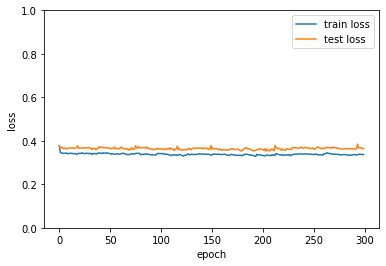

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))

# 확실히 train, test loss가 위의 그래프 형태와 조금 다름.

# 여기서는 regularizer가 없으니까
# 노이즈까지 전부 기존에 있던대로 들어오네! 하고 판정
# loss가 없다고 생각하고 진행하게 됨.
# 그래서 데이터가 그냥 평평한 것.

# 하지만 위의 그래프에서는 급격하게 떨어졌다가 살짝 올라갔다가 살짝 올라갔다가 하는 모습은
# kernel_regularizer = l2(0.01) 이게 있어서 그런 것!!


In [25]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(32, input_dim = 32, 
                activation = 'tanh', # relu 쓰니까 결과 안좋은 것 같아서 tanh로 써보기!
                
                # 실질적으로 노이즈는 학습하지 않게 만들어주며
                # 동시에 반응성도 같이 올려주는 역할로 사용된다.
                # (정규화 과정을 상기하도록 한다!)
                # 정규화를 하면 쓸데없는 가중치를 다 쳐내니까 연산속도가 굉장히 빨라짐.
                # kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01)
                kernel_regularizer = l2(0.01),
                
                
                # bias는 영향력이 큰 애들이 아니기 때문에 민감하게 반응하지는 않을 것임
                
                
                # kernel과 bias의 차이점!!
                # kernel은 네트워크 가중치를 다룬다.
                # bias는 절편에 대한 가중치를 다룬다. (가중치가 그렇게 크게 높지는 않음)
                # 딱 봐도 kernel 가중치가 중요함! 
                
                # 0.01, 0.03 정도의 차이 있어봤자 실질적으로 이 데이터를 추정하는데 있어 큰 영향 주지 않음!
                # 더 중요한 것은 y는 어떤 형태의 ax 형태를 가지느냐가 중요!
                # 절편이 약간의 차이 있는 것은 큰 영향 주지 않음.
                
                # 하지만 0.몇퍼센트가 소중한 상황이라면 (상용제품을 만들기 위해서)
                # bias 정규화도 해줘야 하는 것!!
                bias_regularizer = l2(0.01)
               
    )
)


model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'sgd',
    metrics = ['accuracy']
)

In [26]:
trainRes = model.fit(
    X_train, y_train, 
    batch_size = 10, 
    epochs = 300, 
    validation_data = (X_test, y_test),
    verbose = 0
)

Best Accuracy = 0.8769344091415405


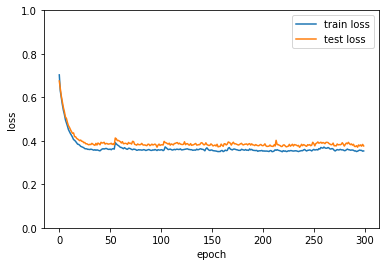

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Best Accuracy =", max(trainRes.history['val_accuracy']))

# 정확도에는 큰 영향 미치지 않았음.
# 근데 이런식으로도 사용 가능함을 확인할 수 있음. (bias_regularizer = l2(0.01)를 사용함으로써)


In [28]:
# 드롭아웃 해보기!

from sklearn.datasets import load_boston

# 보스턴 데이터 가져오기
boston = load_boston()

boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [29]:
X = boston.data
y = boston.target

print(X)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

# X, y의 정보를 베이스로 X값들을 가지고 y를 도출할 수 있는 함수를 만들 준비가 완료!
# 데이터만 분리하고 회귀 분석은 하지 않았음

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# train, test 값을 만들어 냄.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
print(scaler)

# with_mean=True, with_std=True : 평균과 표준편차를 가지고 다루는 정보임을 알려 줌.
# 어떤 확률분포를 배우더라도 각 해당 분포의 평균과 표준편차는 항상 정보를 나타냄!

# Z 분포를 베이스로 해서 값을 구해주는 것이 scaler임!! (평균 0, 표준편차 1인 값들로 scaling 된 것!!)

# 여러 확률 분포들이 있을 때 이들의 평균과 표준편차는 다 다름!
# 이를 비교할 수 있는 형태로 만들어주기 위한 것이 scaler임!!!

StandardScaler(copy=True, with_mean=True, with_std=True)


In [33]:
print(X_train)

# 평균이 0이고 표준편차가 1인 정규화된 데이터를 만들어냈구나를 알 수 있음.

# 값들이 0 근처에 몰려있고,
# 1이상으로 나간 것이 이상치로 보이는 것들! (값이 -1, 1이 넘어가는 애들이 있을 수 있음!!!)
# 일반적으로 정규분포에서 다루는 확률은 96% 넘어가는 범위까지는 실제로 표준편차를 넘어가지 않는데
# 나머지 4% 구간에서 숫자 3, 4가 나오기도 함.
# 따라서 표준편차가 1이더라도 충분이 1을 넘어갈 수 있는 것.

# 적절하게 값들이 섞여 있음

[[-0.20735619 -0.49997924  1.54801583 ...  1.2272573   0.42454294
   3.10807269]
 [-0.38886492  0.34677427 -0.58974728 ...  0.05696346  0.40185312
  -0.66643035]
 [-0.33573486 -0.49997924  1.54801583 ...  1.2272573   0.39846135
   0.63936662]
 ...
 [-0.38450355 -0.49997924 -0.15303077 ... -0.30312696  0.39659002
  -0.30284441]
 [-0.37511786 -0.49997924 -0.59690657 ... -0.25811566  0.37588849
   0.89967717]
 [-0.38592298 -0.49997924 -1.00641779 ... -0.84326258  0.42454294
   0.31822262]]


In [34]:
print(X_test)

[[-0.39454262 -0.49997924 -1.12239824 ... -0.70822867  0.17086147
  -0.72160487]
 [ 0.70419882 -0.49997924  1.00534187 ...  0.77714428  0.0648977
  -0.41177872]
 [-0.38890688 -0.49997924  0.4025299  ... -0.93328518  0.38758427
  -0.27454978]
 ...
 [ 1.61285743 -0.49997924  1.00534187 ...  0.77714428  0.42454294
   2.59876943]
 [-0.34350332 -0.49997924 -0.1687812  ... -0.03305915  0.42454294
  -1.11772962]
 [-0.39902507 -0.49997924 -1.27417512 ...  0.10197476  0.39202867
  -1.02294263]]


In [35]:
print(X.shape)

(506, 13)


In [36]:
# 네트워크 모델 만들기

model = Sequential()

model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'rmsprop'
)

trainRes = model.fit(
    X_train, y_train, 
    batch_size = 5, 
    epochs = 300,
    validation_data = (X_test, y_test),
    verbose = 0
)

Lowest Error on Training = 4.193603038787842
Lowest Error on Test = 13.981400489807129


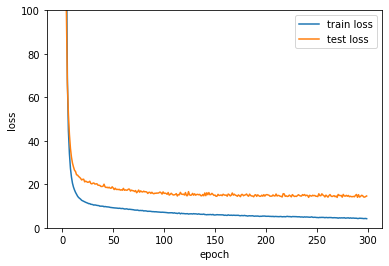

In [37]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Lowest Error on Training =", min(trainRes.history['loss']))
print("Lowest Error on Test =", min(trainRes.history['val_loss']))


# train loss는 학습을 하면 할수록 loss되는 정도가 줄어들고 있음.
# trian loss가 거의 10% 밑에까지 줄였음
# test를 함에 있어서 loss는 20%내에서 떨어트리기가 힘든 모습이 보임. (지글지글 진동하고 있음)

In [38]:
# dropout 해보기

import numpy as np
np.random.seed(1)

In [39]:
from keras.layers import Dropout

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(16, input_dim = 13, activation = 'relu'))

# 드롭 아웃 하나 넣은 상태에서 확인
# 꽤 쎄게 넣긴 했음.
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'rmsprop'
)

trainRes = model.fit(
    X_train, y_train, 
    batch_size = 5, 
    epochs = 300,
    validation_data = (X_test, y_test),
    verbose = 0
)

Lowest Error on Training = 14.460752487182617
Lowest Error on Test = 19.75456428527832
5/5 [==============================] - 0s 488us/step - loss: 22.0494
Test Loss= 22.049436569213867


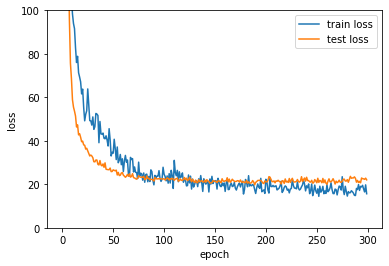

In [41]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Lowest Error on Training =", min(trainRes.history['loss']))
print("Lowest Error on Test =", min(trainRes.history['val_loss']))

# 전반적인 test loss 확인
print("Test Loss=", model.evaluate(X_test, y_test))



In [42]:
# dropout 써서 test loss 어떻게 잡히는지 확인해보기!

model = Sequential()

model.add(Dense(16, input_dim = 13, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(
    loss = 'mean_squared_error',
    optimizer = 'rmsprop'
)

trainRes = model.fit(
    X_train, y_train, 
    batch_size = 5, 
    epochs = 300,
    validation_data = (X_test, y_test),
    verbose = 0
)


Lowest Error on Training = 26.184738159179688
Lowest Error on Test = 24.25444984436035
5/5 [==============================] - 0s 474us/step - loss: 26.1584
Test Loss= 26.158357620239258


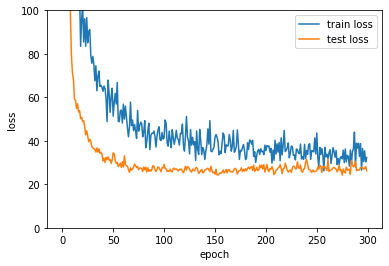

In [43]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

print("Lowest Error on Training =", min(trainRes.history['loss']))
print("Lowest Error on Test =", min(trainRes.history['val_loss']))

# 전반적인 test loss 확인
print("Test Loss=", model.evaluate(X_test, y_test))


# test Loss가 이전보다 증가함.
# dropout했더니 loss값이 더 안좋게 나옴. --> 망한 모델 
# 잘못된 모델을 선택한거구나!

# 잘못된 모델이니까 좋은 모델을 찾아야 함!
# 가령 train, test의 loss 함수가 같다던지!

In [44]:
# 변형된 데이터 집합 만들어보기!

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 400, n_features = 10, n_classes = 2
)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

In [46]:

model = Sequential()

model.add(Dense(16, input_dim = 10, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    batch_size = 5, 
    epochs = 300,
    verbose = 0
)


In [47]:
print("Test Loss =", model.evaluate(X_test, y_test))

# 현재 모델에서는 loss가 0.2정도 나옴.
# Dropout을 썼을 때 정말 내려가는지 확인해보기

4/4 [==============================] - 0s 544us/step - loss: 0.1946
Test Loss = 0.19455792009830475


In [49]:
model = Sequential()

model.add(Dense(16, input_dim = 10, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    batch_size = 5, 
    epochs = 300,
    verbose = 0
)


In [50]:
print("Test Loss =", model.evaluate(X_test, y_test))

# loss가 더 줄어들었음.
# loss를 더 줄이고 싶다면 Dropout을 더 하면 됨!

4/4 [==============================] - 0s 592us/step - loss: 0.1343
Test Loss = 0.13432914018630981


In [54]:
model = Sequential()

model.add(Dense(16, input_dim = 10, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    batch_size = 5, 
    epochs = 300,
    verbose = 0
)


In [55]:
print("Test Loss =", model.evaluate(X_test, y_test))

# 줄지 않고 약간 증가한 것으로 보아 
# model.add(Dropout(0.2))는 큰 역할을 안했다!

4/4 [==============================] - 0s 611us/step - loss: 0.1508
Test Loss = 0.15079602599143982


In [58]:
model = Sequential()

model.add(Dense(16, input_dim = 10, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    batch_size = 5, 
    epochs = 300,
    verbose = 0
)


In [59]:
print("Test Loss =", model.evaluate(X_test, y_test))

# Dropout 수치를 적절하게 조절하니까 loss가 줄어듦!
# 잘 조정함으로써 네트워크 모델을 더 강화할 수 있음!!

# Dropout을 적재적소에 잘 활용해야 한다!! (5장의 요약!)

4/4 [==============================] - 0s 601us/step - loss: 0.1491
Test Loss = 0.14905881881713867


In [60]:
# 5장 결론~!!!

In [61]:
# 정규화 결론!

# l2는 오차에 대한 에러율을 낮추는데 활용한다.
# 오차의 제곱을 가지고 연산하므로 잘못된 정보를 판단할 가능성 자체가 적음 (+와 -가 상쇄되서 오차가 0이다 라는 오류를 범할 일 없음!)
# 특히 음수와 양수 형태로 구성된 오차간에 정보 오판율은 굉장히 낮다.

# 하지만 단점은,
# 큰값을 가지고 제곱하면 한없이 커지고, 작은 값을 가지고 제곱하면 한없이 작아짐!!
# 분산값이 굉장히 커질 수 있다는 것이 l2의 단점이다!!!

# l1과 l2를 같이 쓰는 이유가
# 이 단점을 보완하기 위해서임!! (l1만 쓰는 경우는 많지 않음)

# 분산이 커지는 것이 싫다면 l1_l2를 사용하도록 한다!


In [62]:
# Dropout 결론!!

# Dropout 은 잡음에 대한 정보도 학습하는 과적합을 해결하기 위한 녀석!
# 그러므로 일정 수치 이하의 정보에 대해서는 걸러내도록 만든다.
# 이 수치를 너무 크게 줄 경우 실제 정보도 같이 증발되므로
# 적정한 수치값을 찾아내는 것이 매우 중요하다.

# 과적합 해결하기 위해서 수치 너무 크게 잡으면 본전도 못 뽑는 것!!!

In [63]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [64]:
X, y = make_classification(
    n_samples = 500, n_features = 16, n_classes = 2
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0
)

In [65]:
print(X.shape)

(500, 16)


In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [67]:
model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = 16))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
# 중간에 tanh가 하나 들어가니까 -1과 1을 포함함.
# 그런데 지금 오차를 l1이나 l2로 사용하지 않았음.
# 그래서 tanh에 의한 에러율이 굉장히 높아짐.
# (sigmoid는 0부터 1)


model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy'
)

trainRes = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 400,
    batch_size = 5,
    verbose = 0
)

print("Test Loss =", model.evaluate(X_test, y_test))

# loss의 정도가 61%정도임. 
# 상당히 loss가 큼!!


5/5 [==============================] - 0s 628us/step - loss: 0.6159
Test Loss = 0.615865170955658


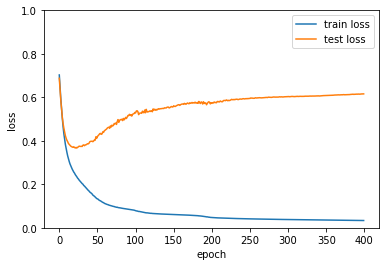

In [69]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

# 결과가 train은 훈련할 수록 loss가 줄어듦
# test는 훈련할수록 loss가 잠깐 줄었다가 점점 늘고 있음.

# 과소적합의 해결법 : 데이터 증가
# 과적합의 해결법 : 정규화 (오차 최소화), Dropout써서 잡음 걸러내기

# train은 학습 많이 할수록 좋아지는데, test는 학습 많이 할수록 안 좋아짐.

# test 데이터를 보면 
# ==> 0~30 구간까지는 적절한 훈련 구간인 것! (훈련이 70%까지 유지하기 때문에)
#     훈련 많이 했더니 잡음(노이즈)까지 학습한 것!                        ===> 대표적인 과적합의 예!
# 그래서 일부러 tanh를 넣어본 것

In [ ]:
# 적정선에서 멈출 필요가 있음!! (그 선을 찾는 것이 조기 중단!) ==> EarlyStopping!!

# 위의 그래프를 보면, 
# 훈련을 많이 했더니 훈련 로스는 없다.
# 그런데 테스트 로스가 높아진다 ?
# (훈련을 많이 했는데 테스트를 했더니 결과가 잘못된게 많이 나오지?)
# ==> 결국 과적합이 되어서 노이즈 정보까지 처리를 하는 상황

# 해결책
# 1. 훈련 수를 줄이면 된다. (EarlyStopping) - 조기 중단
# 2. l2를 사용해서 오차의 제곱의 합을 가지고 연산
#    오차가 양수(+), 음수(-)로 인해 잘못된 판정을 할 수 있다.
#    그러므로 양쪽 모두 양수가 될 수 있는 제곱 형태를 취함
# 3. Dropout은 일정 확률 이하의 정보를 폐기처분

In [71]:
from keras.callbacks import EarlyStopping

In [80]:
model = Sequential()

# 뉴럴넷을 구성
model.add(Dense(16, input_dim = 16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)


# EarlyStopping을 사용한다면
# Fit을 하기 이전에 어디서 중단할지를 정해줘야 한다.
es_callback = EarlyStopping(
    # val_loss : 테스트 로스를 감독함
    monitor = 'val_loss',
    # mode = 'min'은 최소값을 감지함
    mode = 'min'
)
# min값을 찍으면 끝내라!는 의미!
# 테스트의 loss 값을 감독하고 있다가 최소값이 되는 지점을 
# (뒤쪽에 나오는 데이터들이 loss값이 낮아질 수가 있고 올라갈 수가 있음. 
# 뒤쪽에 나오는 데이터들을 쭉 보고 있다가 loss가 갑자기 상승하기 시작하면 그 지점에서 끊어버리겠다!는 의미)


# 콜백이란?
# 일종의 이벤트
# 몰컴 - 예시


# 콜백을 발생시키는 것은
# 특정한 사건(event)임 --> 원래 예상 못했던 돌발 변수 발생 
# 이 돌발 변수를 사건(또는 이벤트)라고 함.

# 돌발 변수를 처리하는 것을 handler(핸들러) 또는 콜백(callback)이라고 함. (하드웨어에서는 인터럽트 핸들러)

# fitting을 할 때 (값을 추정하는 구간)
# 조건이 만족되면 콜백을 발생시켜서 중단되도록 하는 것
trainRes = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    batch_size = 5, 
    epochs = 400,
    
    # 조건이 만족되면 콜백에 의해 fit이 중단되도록 구성한 부분
    # 일종의 interupt, event!
    callbacks = [es_callback],
    verbose = 0
)

print("Test Loss =", model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 666us/step - loss: 0.3613
Test Loss = 0.3613143265247345


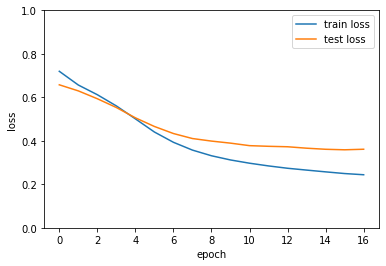

In [81]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

# 이 그래프에서는 쭉 학습하다가
# loss가 올라갈 것 같으니까 끊어버림!

# 콜백은 과적합을 방지할 수 있는
# 또다른 방법 중 하나!!

In [74]:
from keras.layers import GaussianNoise

In [114]:
model = Sequential()

model.add(Dense(16, input_dim = 16, activation = 'relu'))
model.add(GaussianNoise(0.01))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    batch_size = 5, 
    epochs = 400,
    verbose = 0
)

print("Test Loss =", model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 557us/step - loss: 0.5730
Test Loss = 0.5729964971542358


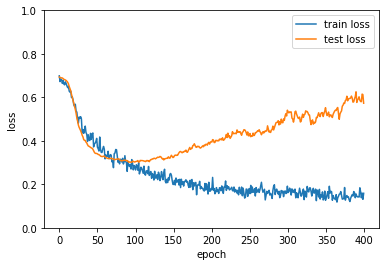

In [115]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')


In [94]:
model = Sequential()

model.add(Dense(16, input_dim = 16, activation = 'relu'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    batch_size = 5, 
    epochs = 400,
    verbose = 0
)

print("Test Loss =", model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 867us/step - loss: 0.4981
Test Loss = 0.4980524182319641


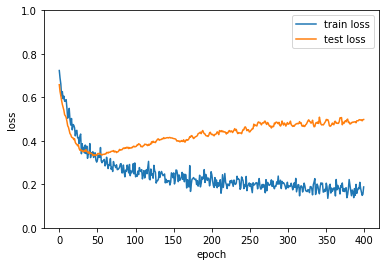

In [95]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

# 아까 전에는 과적합이 되어서 올라가는 것이 굉장히 가팔랐는데,
# 지금의 그래프(가우시안 노이즈를 집어넣었을 때)는 그런 일이 있더라도
# 올라가는 폭이 굉장히 느림!
# 가우시안 노이즈를 집어넣으면 test에 대한 에러율을 많이 낮출 수 있음.

In [96]:
model = Sequential()

model.add(Dense(16, input_dim = 16, activation = 'relu'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'tanh'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    batch_size = 5, 
    epochs = 400,
    verbose = 0
)

print("Test Loss =", model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 661us/step - loss: 0.4360
Test Loss = 0.43599069118499756


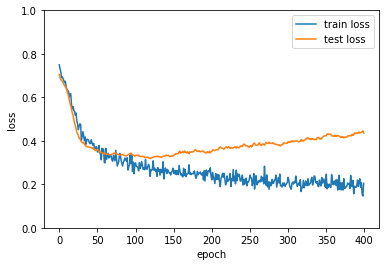

In [97]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

# 가우시안 노이즈를 전구간에 걸어봤을 때에는 
# 조금 더 loss율이 낮아진 것처럼 보임

In [98]:
model = Sequential()

model.add(Dense(16, input_dim = 16, activation = 'relu'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'relu'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'relu'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    batch_size = 5, 
    epochs = 400,
    verbose = 0
)

print("Test Loss =", model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 925us/step - loss: 0.4879
Test Loss = 0.4879266917705536


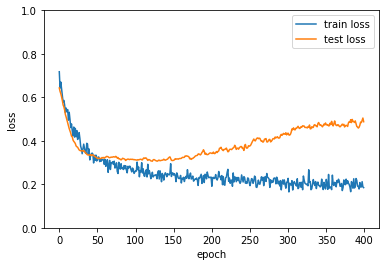

In [99]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

In [116]:
model = Sequential()

model.add(Dense(16, input_dim = 16, activation = 'relu'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'tanh'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'tanh'))
model.add(GaussianNoise(0.1))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'sgd'
)

trainRes = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test),
    batch_size = 5, 
    epochs = 400,
    verbose = 0
)

print("Test Loss =", model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 593us/step - loss: 0.4592
Test Loss = 0.4592377245426178


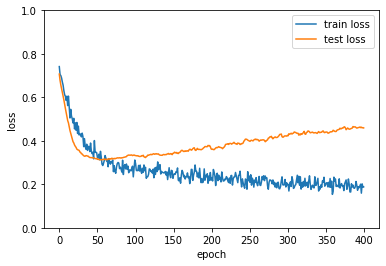

In [117]:
plt.plot(trainRes.history['loss'])
plt.plot(trainRes.history['val_loss'])
plt.ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc = 'upper right')

# tanh는 가우시안 노이즈에 의한 과적합이 굉장히 방어가 잘 되는 편.
# 이 케이스에서는 relu쓰는 것이 더 안좋음 
# relu는 가우시안 노이즈에 의한 과적합이 방어가 잘 안되는 편.

In [ ]:
# 원래 데이터는 EarlyStopping을 사용해야 될 정도로 과적합이 심하게 되는 케이스였음.
# 강제로 노이즈를 추가해서 구성하니까 학습을 많이 하면 training에 대한 loss는 점점 줄어들고,
# test loss의 감소 폭이 작다는 것도 확인했음!

# 가장 좋은 것은 training에 대한 loss도 줄어들고, test에 대한 loss도 줄어들게 만드는 것이 가장 최적의 결과
# 어쩔 수 없는 경우에는 이런식으로라도 test에 대한 것을 끌어올려줘야 함.

# 임시 방편으로라도 training을 계속해야하는 경우에는 test에 대한 loss를 낮추는 것이 중요하기 때문에
# 가우시안 노이즈를 많이 잡는 편임!

# 특히 영상분야에서는 가우시안 노이즈는 중요한 부분을 차지하고 있음.


# 정리~!
# l2            -> 오차를 제곱해서 음수든 양수든 항상 양수로 오차를 유지! (단점은 분산값이 커짐)
# Dropout       -> 일정 구간 내에서 적절한 범위를 강제로 짤라내서 쓸모없는 네트워크 자체를 끊어냄.
# 가우시안 노이즈  -> 과적합을 진행하게 될 때 그것에 대한 영향력을 최소화시키는 기법 중 하나
#                  네트워크 구성 상 가우시안 노이즈를 이용해서 그래프에서 loss값을 밑으로 떨어지게 만들어야 함.
#                  하지만 위의 테스트로 만든 네트워크에서는 이것을 진행하지 못했음.

In [100]:
# 6장

In [101]:
import pandas as pd

In [103]:
!ls Applied-Deep-Learning-with-Keras

Lesson01  Lesson03  Lesson05  Lesson07	Lesson09  README.md
Lesson02  Lesson04  Lesson06  Lesson08	LICENSE


In [104]:
!ls Applied-Deep-Learning-with-Keras/Lesson06

Activity11.ipynb  data		    Exercise17.ipynb
Activity12.ipynb  Exercise16.ipynb  Exercise18.ipynb


In [105]:
!ls Applied-Deep-Learning-with-Keras/Lesson06/data

Flu.csv  Health_Data.csv


In [109]:
nadm = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson06/data/Flu.csv"
)

nadm.head()

,patient id,diagnosis
0,1001,1
1,1002,1
2,1003,1
3,1004,0
4,1005,1


In [110]:
nadm.diagnosis.value_counts()
# 계측할 수 있는 정보들 중에서 0과 1이 몇개 나왔는지 확인 가능

1    96
0     4
Name: diagnosis, dtype: int64

In [113]:
nadm.diagnosis.value_counts().head(1) / len(nadm.diagnosis)

# 96%가 감기 걸린 사람들의 확률임!
# 예측도 잘했음.
# 널 정확성이 96%임을 알 수 있음.

1    0.96
Name: diagnosis, dtype: float64